# The fish database

### (A) Determine the mass of the fish using the species as a categorical explanatory variable & prove that the coefficients relative to zeros are indeed the mean mass per species

### (B) For the Bream species, predict the mass from the length

### (C) For the Perch species, predict the mass from the length - nonlinear relationship

### (D) For the Roach species, predict the mass from the length - Find extreme values and determine the leverage and influence


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the ols function
from statsmodels.formula.api import ols
# Import qqplot
from statsmodels.api import qqplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
fish = pd.read_csv("../data/fish.csv")
print(fish.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


### (A) Predicting the mass of the fish using the species as a categorical explanatory variable & proving that the coefficients relative to zeros are indeed the mean mass per species

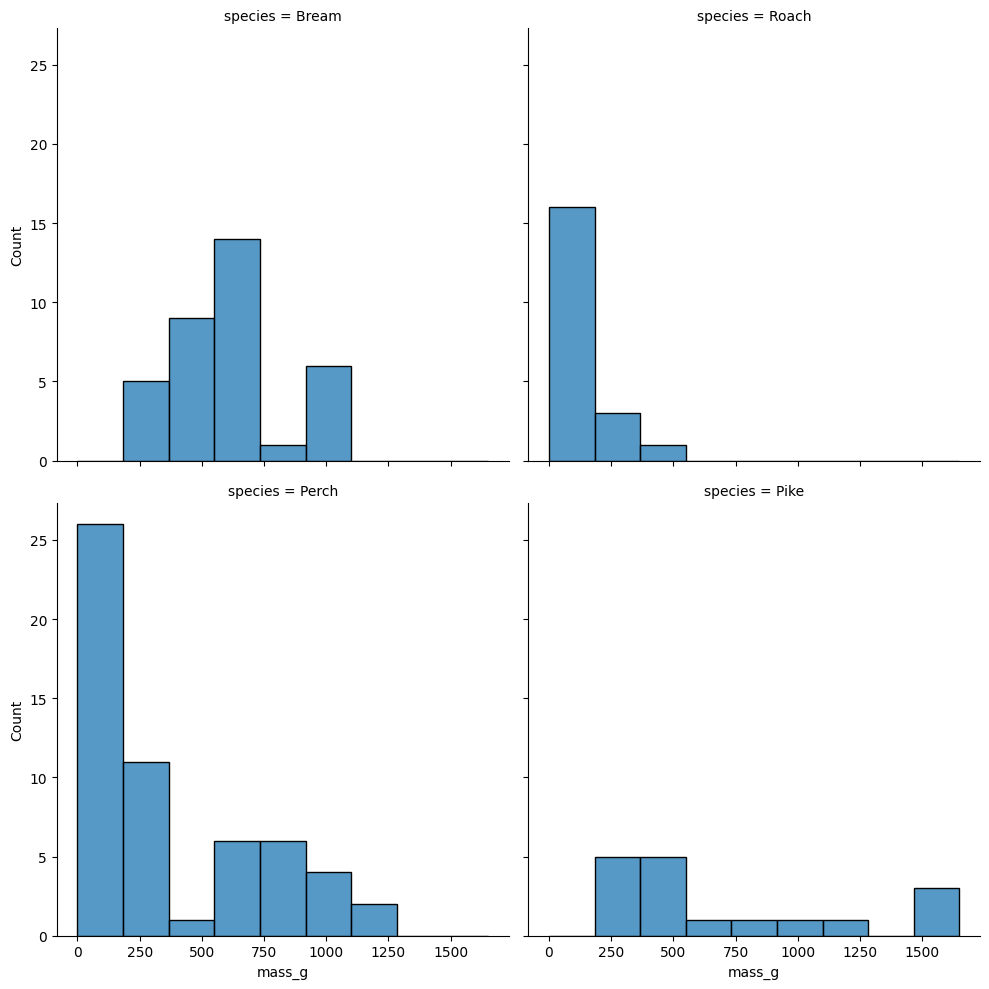

In [3]:
sns.displot(data=fish,
            x="mass_g",
            col="species",
            col_wrap=2,
            bins=9)

plt.show()

In [20]:
# Summary statistics: mean mass by species
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [5]:
mdl_mass_vs_species = ols(
    "mass_g ~ species", data=fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [21]:
# Make the coefficients relative to zero (practically subtracting from the intercept!)
# The linear coefficients are the means of each category.

mdl_mass_vs_species = ols(
    "mass_g ~ species + 0", data=fish).fit()
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


In [22]:
# The coefficients relative to zeros are indeed the mean mass per species

## (B) For the Bream species, predict the mass from the length

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


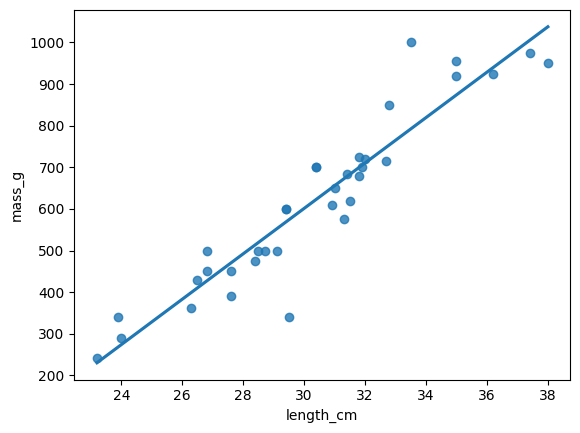

Intercept   -1035.347565
length_cm      54.549981
dtype: float64
    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


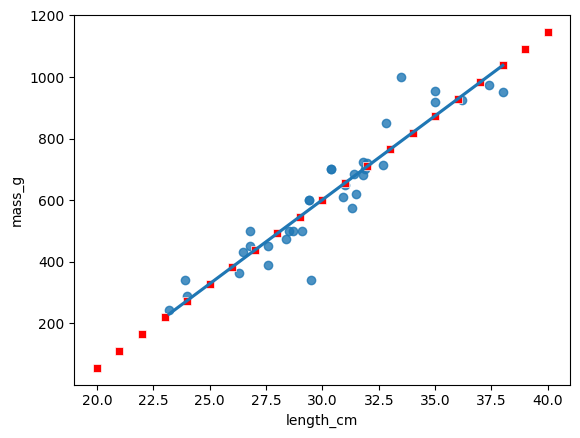

In [23]:
bream = fish[fish["species"] == "Bream"]
print(bream.head())

sns.regplot(x="length_cm",
            y="mass_g",
            data=bream,
            ci=None)

plt.show()

mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

#making predictions
explaratory_data = pd.DataFrame({
    "length_cm": np.arange(20, 41)
})

# print(mdl_mass_vs_length.predict(explaratory_data))

prediction_data = explaratory_data.assign(
    mass_g= mdl_mass_vs_length.predict(explaratory_data)
)
print(prediction_data)

# showing predictions
fig = plt.figure()
sns.regplot(x= "length_cm",
            y= "mass_g",
            ci= None,
            data= bream
            )
sns.scatterplot(x="length_cm",
            y= "mass_g",
            data= prediction_data,
            color= "red",
            marker= "s"
            )
plt.show()


In [8]:
# fitted values: predictions on the original datasets
print(mdl_mass_vs_length.fittedvalues)

# residuals: actual response values minus predicted response values
print(mdl_mass_vs_length.resid)

# or equivalently
print(bream["mass_g"] - mdl_mass_vs_length.fittedvalues)

mdl_mass_vs_length.summary()

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64
0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.06683

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.22e-16
Time:                        10:23:51   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Quantifying the model

# r-squared
print(mdl_mass_vs_length.rsquared)

# This is the same as the squared correlation
coeff_determination = bream["length_cm"].corr(bream["mass_g"]) ** 2
print(coeff_determination)

# mean squared error of the residuals
mse = mdl_mass_vs_length.mse_resid 
print("mse: ", mse)

# Residual standard error -> has the same unit as the response variable
rse = np.sqrt(mse)
print("rse: ", rse)

# manual calculations of rse
residuals_sq = mdl_mass_vs_length.resid ** 2
resid_sum_of_sq = sum(residuals_sq) 
deg_freedom = len(bream.index) - 2 # No observations - No of model coefficients
rse = np.sqrt(resid_sum_of_sq/deg_freedom)
print("rse: ", rse)
print("The difference between predicted bream masses and observed bream masses is typically about: ", rse, "g")


# manual calculations of Root-mean-square error (RMSE)
residuals_sq = mdl_mass_vs_length.resid ** 2
resid_sum_of_sq = sum(residuals_sq) 
n_ob = len(bream.index)
rmse = np.sqrt(resid_sum_of_sq/n_ob)
print("rmse: ", rmse)



0.8780627095147175
0.8780627095147175
mse:  5498.555084973519
rse:  74.15224261594196
rse:  74.15224261594196
The difference between predicted bream masses and observed bream masses is typically about:  74.15224261594196 g
rmse:  72.00244396727618


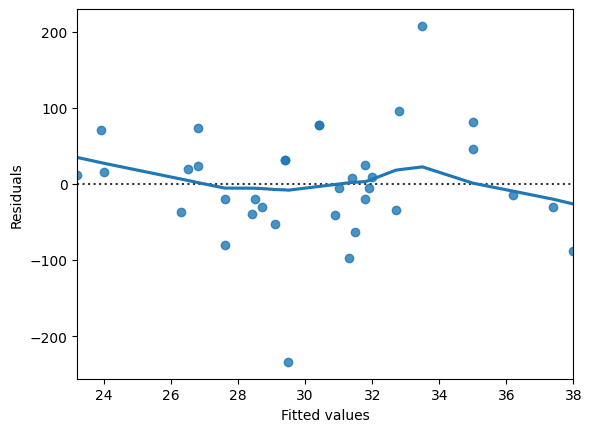

In [27]:
# visualising model fit

sns.residplot(
    x="length_cm",
    y="mass_g",
    data=bream,
    lowess=True
)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

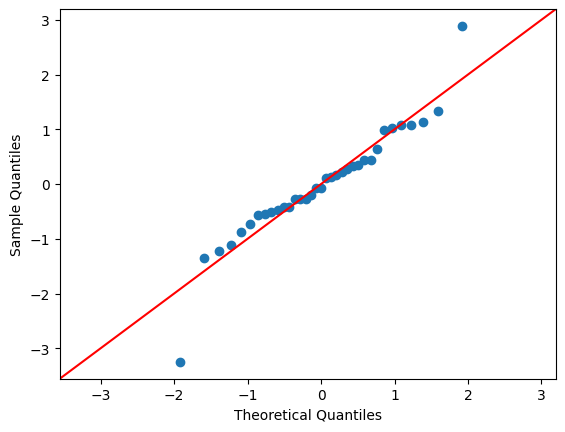

In [31]:
# visualising model fit
#qqplot()

qqplot(data=mdl_mass_vs_length.resid, fit=True, line="45")
plt.show()

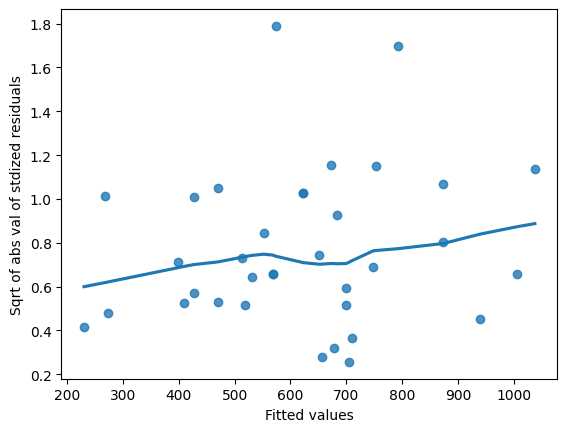

In [30]:
# visualising model fit##Scale-location plot
model_norm_residuals_bream = mdl_mass_vs_length.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))
sns.regplot(x=mdl_mass_vs_length.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, 
            lowess=True
            )
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

## (C) For the Perch species, predict the mass from the length

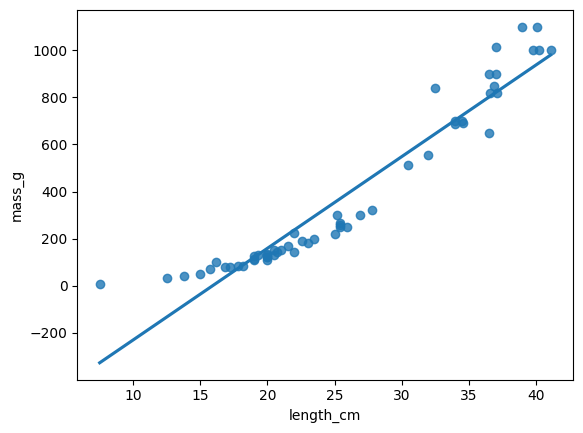

In [32]:
perch = fish[fish["species"] == "Perch"]

sns.regplot(x="length_cm",
            y="mass_g",
            data=perch,
            ci=None)

plt.show()

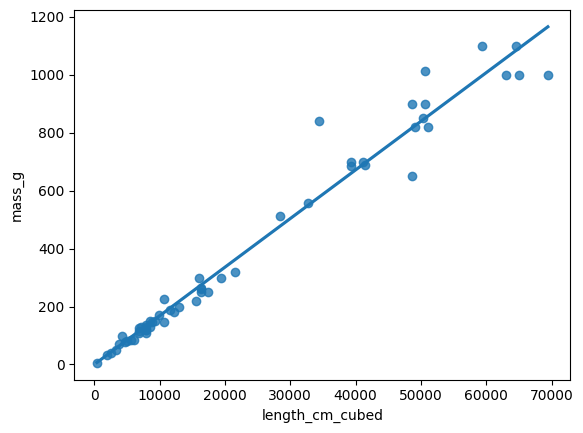

In [33]:
# Transforming the data
# mass vs length cubed

perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed",
            y="mass_g",
            data=perch,
            ci=None)

plt.show()


In [34]:
mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
print(mdl_perch.params)

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64


   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


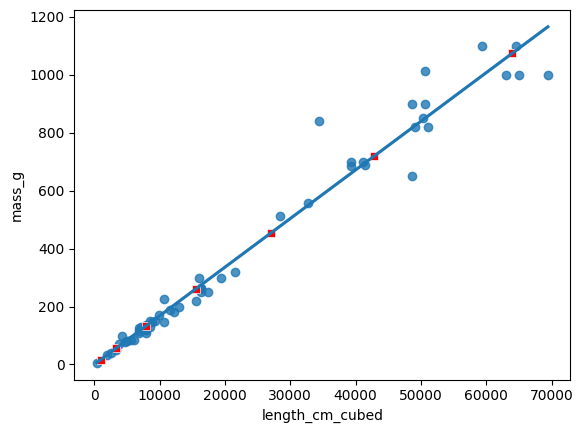

In [35]:
#making predictions
explaratory_data = pd.DataFrame({
    "length_cm_cubed": np.arange(10, 41, 5) ** 3,
    "length_cm":np.arange(10, 41, 5)
})

prediction_data = explaratory_data.assign(
    mass_g= mdl_perch.predict(explaratory_data)
)
print(prediction_data)

# showing predictions
fig = plt.figure()
sns.regplot(x= "length_cm_cubed",
            y= "mass_g",
            ci= None,
            data= perch
            )
sns.scatterplot(x="length_cm_cubed",
            y= "mass_g",
            data= prediction_data,
            color= "red",
            marker= "s"
            )
plt.show()


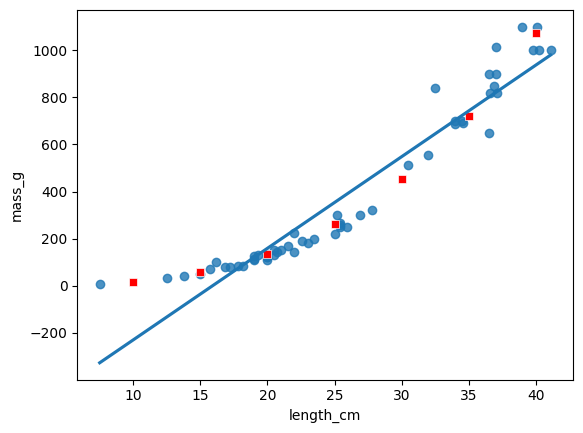

In [36]:
# showing predictions
fig = plt.figure()
sns.regplot(x= "length_cm",
            y= "mass_g",
            ci= None,
            data= perch
            )
sns.scatterplot(x="length_cm",
            y= "mass_g",
            data= prediction_data,
            color= "red",
            marker= "s"
            )
plt.show()

### (D) For the Roach species, predict the mass from the length

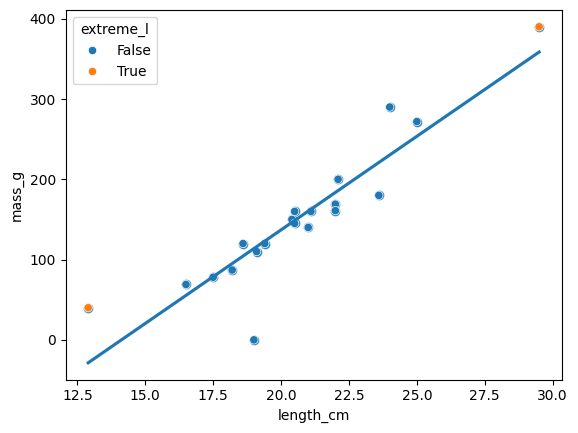

In [37]:
roach = fish[fish["species"] == "Roach"]

roach["extreme_l"] = ((roach["length_cm"] < 15) | (roach["length_cm"] > 26))

figh = plt.figure()
sns.regplot(
    x="length_cm",
    y="mass_g",
    data=roach,
    ci=None
)

sns.scatterplot(
    x="length_cm",
    y="mass_g",
    data=roach,
    hue="extreme_l"
)

plt.show()

<Axes: xlabel='length_cm', ylabel='mass_g'>

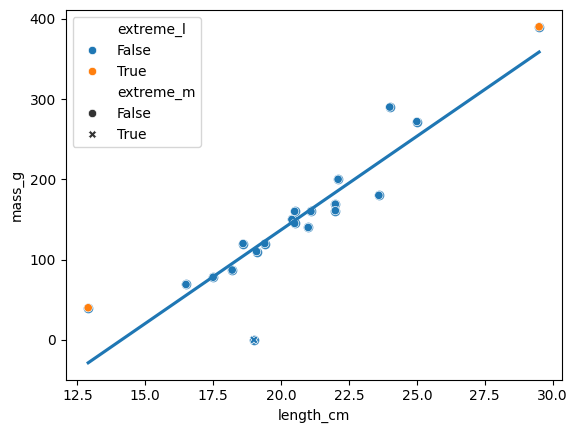

In [38]:
# Response values away from the regression line

roach["extreme_m"] = roach["mass_g"] < 1

figh = plt.figure()
sns.regplot(
    x="length_cm",
    y="mass_g",
    data=roach,
    ci=None
)

sns.scatterplot(
    x="length_cm",
    y="mass_g",
    data=roach,
    hue= "extreme_l",
    style="extreme_m"
)


In [39]:
# leverage and influence
# Leverage is a measure of how extreme the explaratory variables are
# Influence measures how much the model would change of you left the observatiob out of the dataset when modeling. 

mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()
roach["leverage"] = summary_roach["hat_diag"]

print(roach.head())

   species  mass_g  length_cm  extreme_l  extreme_m  leverage
35   Roach    40.0       12.9       True      False  0.313729
36   Roach    69.0       16.5      False      False  0.125538
37   Roach    78.0       17.5      False      False  0.093487
38   Roach    87.0       18.2      False      False  0.076283
39   Roach   120.0       18.6      False      False  0.068387


In [40]:
# Cook's distance
# It is the most common measure of influence

roach["cooks_dist"] = summary_roach["cooks_d"]
print(roach.head())

   species  mass_g  length_cm  extreme_l  extreme_m  leverage  cooks_dist
35   Roach    40.0       12.9       True      False  0.313729    1.074015
36   Roach    69.0       16.5      False      False  0.125538    0.010429
37   Roach    78.0       17.5      False      False  0.093487    0.000020
38   Roach    87.0       18.2      False      False  0.076283    0.001980
39   Roach   120.0       18.6      False      False  0.068387    0.006610


In [42]:
# Most ifluential roaches

print(roach.sort_values("cooks_dist", ascending=False))


   species  mass_g  length_cm  extreme_l  extreme_m  leverage  cooks_dist
35   Roach    40.0       12.9       True      False  0.313729    1.074015
54   Roach   390.0       29.5       True      False  0.394740    0.365782
40   Roach     0.0       19.0      False       True  0.061897    0.311852
52   Roach   290.0       24.0      False      False  0.099488    0.150064
51   Roach   180.0       23.6      False      False  0.088391    0.061209
53   Roach   272.0       25.0      False      False  0.133386    0.020615
49   Roach   161.0       22.0      False      False  0.058072    0.011516
36   Roach    69.0       16.5      False      False  0.125538    0.010429
46   Roach   140.0       21.0      False      False  0.050554    0.007950
39   Roach   120.0       18.6      False      False  0.068387    0.006610
48   Roach   169.0       22.0      False      False  0.058072    0.004817
50   Roach   200.0       22.1      False      False  0.059308    0.004519
45   Roach   160.0       20.5      Fal

In [ ]:

"""
35   Roach    40.0       12.9       True      False  0.313729    1.074015  <-- very short roach
54   Roach   390.0       29.5       True      False  0.394740    0.365782  <-- very long roach
40   Roach     0.0       19.0      False       True  0.061897    0.311852  <-- roach with zero mass
"""

<Axes: xlabel='length_cm', ylabel='mass_g'>

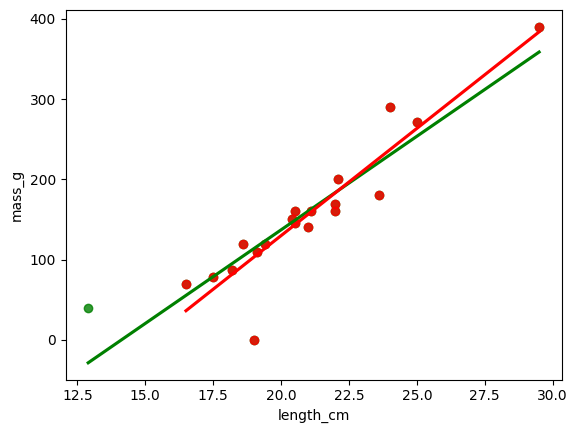

In [44]:
# Removing the most influential roach

roach_not_short = roach[roach["length_cm"] != 12.9]

figh = plt.figure()
sns.regplot(
    x="length_cm",
    y="mass_g",
    data=roach,
    ci=None,
    color="green"
)

sns.regplot(
    x="length_cm",
    y="mass_g",
    data=roach_not_short,
    color="red",
    ci=None

)